In [1]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import glob

In [2]:
path = "Desktop\Country_data"
all_files = glob.glob(path+"\*.csv")
all_files

['Desktop\\Country_data\\Afghanistan.csv',
 'Desktop\\Country_data\\Albania.csv',
 'Desktop\\Country_data\\Algeria.csv',
 'Desktop\\Country_data\\Andorra.csv',
 'Desktop\\Country_data\\Angola.csv',
 'Desktop\\Country_data\\Anguilla.csv',
 'Desktop\\Country_data\\Antigua and Barbuda.csv',
 'Desktop\\Country_data\\Argentina.csv',
 'Desktop\\Country_data\\Armenia.csv',
 'Desktop\\Country_data\\Aruba.csv',
 'Desktop\\Country_data\\Australia.csv',
 'Desktop\\Country_data\\Austria.csv',
 'Desktop\\Country_data\\Azerbaijan.csv',
 'Desktop\\Country_data\\Bahamas.csv',
 'Desktop\\Country_data\\Bahrain.csv',
 'Desktop\\Country_data\\Bangladesh.csv',
 'Desktop\\Country_data\\Barbados.csv',
 'Desktop\\Country_data\\Belarus.csv',
 'Desktop\\Country_data\\Belgium.csv',
 'Desktop\\Country_data\\Belize.csv',
 'Desktop\\Country_data\\Benin.csv',
 'Desktop\\Country_data\\Bermuda.csv',
 'Desktop\\Country_data\\Bhutan.csv',
 'Desktop\\Country_data\\Bolivia.csv',
 'Desktop\\Country_data\\Bonaire Sint Eusta

In [3]:
li = []

for filename in all_files:
    data = pd.read_csv( filename, index_col = None, header = 0 )
    li.append(data)

datas = pd.concat(li, axis=0, ignore_index =  True )

In [4]:
datas.sample(10)

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,people_partly_vaccinated
6585,Chile,2021-04-24,"Pfizer/BioNTech, Sinovac",https://github.com/MinCiencia/Datos-COVID19,14155759.0,7962337.0,6193422.0,0.0,NaN
26921,New Zealand,2021-04-20,Pfizer/BioNTech,https://www.health.govt.nz/our-work/diseases-a...,187439.0,144288.0,43148.0,3.0,NaN
16046,Hungary,2021-05-27,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",https://koronavirus.gov.hu/cikkek/5-millio-85-...,8530199.0,5084642.0,3445557.0,NaN,NaN
7712,Cote d'Ivoire,2021-03-06,Oxford/AstraZeneca,https://www.facebook.com/mshpcmu/posts/1848616...,2058.0,2058.0,NaN,NaN,NaN
21730,Liechtenstein,2021-01-16,Pfizer/BioNTech,https://opendata.swiss/en/dataset/covid-19-sch...,46.0,46.0,0.0,0.0,NaN
29388,Paraguay,2021-06-29,"Covaxin, Moderna, Oxford/AstraZeneca, Pfizer/B...",https://www.vacunate.gov.py/index-listado-vacu...,917170.0,750863.0,166307.0,NaN,NaN
13717,Germany,2021-12-11,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",https://impfdashboard.de/,135143093.0,60568998.0,57922557.0,20197289.0,NaN
41620,Wales,2021-11-10,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,5309697.0,2455003.0,2250655.0,604039.0,NaN
15505,Honduras,2021-06-22,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",https://www.facebook.com/saludhn/posts/1839837...,591888.0,533888.0,58000.0,NaN,NaN
41703,Wales,2022-02-01,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,6772387.0,2511342.0,2369003.0,1892042.0,NaN


In [5]:
datas.shape

(42342, 9)

In [6]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42342 entries, 0 to 42341
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   location                  42342 non-null  object 
 1   date                      42342 non-null  object 
 2   vaccine                   42342 non-null  object 
 3   source_url                42342 non-null  object 
 4   total_vaccinations        41876 non-null  float64
 5   people_vaccinated         39639 non-null  float64
 6   people_fully_vaccinated   38306 non-null  float64
 7   total_boosters            19083 non-null  float64
 8   people_partly_vaccinated  7 non-null      float64
dtypes: float64(5), object(4)
memory usage: 2.9+ MB


In [7]:
datas.dtypes

location                     object
date                         object
vaccine                      object
source_url                   object
total_vaccinations          float64
people_vaccinated           float64
people_fully_vaccinated     float64
total_boosters              float64
people_partly_vaccinated    float64
dtype: object

In [8]:
datas.isnull().sum()

location                        0
date                            0
vaccine                         0
source_url                      0
total_vaccinations            466
people_vaccinated            2703
people_fully_vaccinated      4036
total_boosters              23259
people_partly_vaccinated    42335
dtype: int64

<AxesSubplot:>

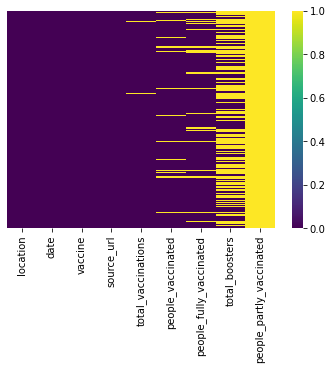

In [9]:
sns.heatmap(datas.isnull(),yticklabels=False,cmap="viridis")

In [10]:
datas = datas.replace(np.nan,0)

In [11]:
datas.isnull().sum()

location                    0
date                        0
vaccine                     0
source_url                  0
total_vaccinations          0
people_vaccinated           0
people_fully_vaccinated     0
total_boosters              0
people_partly_vaccinated    0
dtype: int64

<AxesSubplot:>

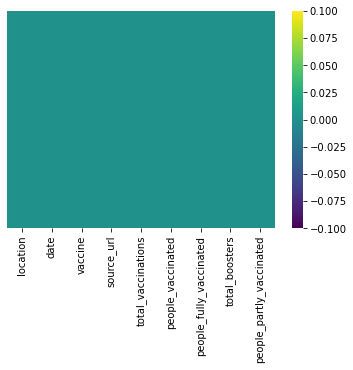

In [12]:
sns.heatmap(datas.isnull(),yticklabels=False,cmap="viridis")

In [13]:
datas.dtypes

location                     object
date                         object
vaccine                      object
source_url                   object
total_vaccinations          float64
people_vaccinated           float64
people_fully_vaccinated     float64
total_boosters              float64
people_partly_vaccinated    float64
dtype: object

In [14]:
datas.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,people_partly_vaccinated
count,4.234200e+04,4.234200e+04,4.234200e+04,4.234200e+04,4.234200e+04
mean,4.218928e+07,1.557758e+07,1.145038e+07,1.415322e+06,2.783818e+03
std,2.113938e+08,6.447911e+07,4.931558e+07,7.357271e+06,2.168326e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.638955e+05,1.913478e+05,5.414100e+04,0.000000e+00,0.000000e+00
50%,3.223602e+06,1.570356e+06,9.735310e+05,0.000000e+00,0.000000e+00
75%,1.570089e+07,7.267370e+06,5.645384e+06,9.560250e+03,0.000000e+00
max,3.165486e+09,1.269302e+09,1.234540e+09,5.547280e+08,1.818530e+07


In [15]:
datas.median()

C:\Users\Anubha\AppData\Local\Temp/ipykernel_28632/3801864667.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  datas.median()


total_vaccinations          3223602.5
people_vaccinated           1570356.0
people_fully_vaccinated      973531.0
total_boosters                    0.0
people_partly_vaccinated          0.0
dtype: float64

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/AnubhaT-code/covid-19-data/master/public/data/latest/owid-covid-latest.csv')

In [17]:
df.sample(10)

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
221,UZB,Asia,Uzbekistan,2022-03-08,236994.0,27.0,70.429,1637.0,0.0,0.143,...,1.3,24.7,NaN,4.000,71.72,0.720,NaN,NaN,NaN,NaN
84,GRD,North America,Grenada,2022-03-08,13690.0,0.0,0.000,216.0,0.0,0.000,...,NaN,NaN,NaN,3.700,72.40,0.779,NaN,NaN,NaN,NaN
10,ABW,North America,Aruba,2022-03-08,33732.0,0.0,6.857,212.0,0.0,0.143,...,NaN,NaN,NaN,NaN,76.29,NaN,NaN,NaN,NaN,NaN
111,KIR,Oceania,Kiribati,2022-03-08,3000.0,9.0,8.571,13.0,1.0,0.286,...,35.9,58.9,NaN,1.900,68.37,0.630,NaN,NaN,NaN,NaN
183,SRB,Europe,Serbia,2022-03-08,1930437.0,2588.0,2368.000,15488.0,25.0,29.714,...,37.7,40.2,97.719,5.609,76.00,0.806,NaN,NaN,NaN,NaN
202,SYR,Asia,Syria,2022-03-08,55140.0,55.0,68.000,3102.0,3.0,3.286,...,NaN,NaN,70.598,1.500,72.70,0.567,NaN,NaN,NaN,NaN
172,RWA,Africa,Rwanda,2022-03-08,129567.0,7.0,7.286,1459.0,1.0,0.286,...,4.7,21.0,4.617,NaN,69.02,0.543,NaN,NaN,NaN,NaN
62,SLV,North America,El Salvador,2022-03-08,156364.0,0.0,0.000,4092.0,1.0,2.571,...,2.5,18.8,90.650,1.300,73.32,0.673,NaN,NaN,NaN,NaN
43,CHN,Asia,China,2022-03-08,111857.0,337.0,301.000,4636.0,0.0,0.000,...,1.9,48.4,NaN,4.340,76.91,0.761,NaN,NaN,NaN,NaN
205,TZA,Africa,Tanzania,2022-03-08,33620.0,0.0,0.000,798.0,0.0,0.000,...,3.3,26.7,47.953,0.700,65.46,0.529,NaN,NaN,NaN,NaN


In [18]:
df.shape

(231, 67)

In [19]:
df = df.replace(np.nan,0)

In [20]:
df.sample(10)

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
210,TTO,North America,Trinidad and Tobago,2022-03-08,130964.0,432.0,402.714,3667.0,2.0,5.000,...,0.0,0.0,89.443,3.00,73.51,0.796,0.0,0.0,0.0,0.0
40,CAF,Africa,Central African Republic,2022-03-08,14320.0,0.0,13.571,113.0,0.0,0.000,...,0.0,0.0,16.603,1.00,53.28,0.397,0.0,0.0,0.0,0.0
82,GRC,Europe,Greece,2022-03-08,2538168.0,21057.0,14185.143,26303.0,57.0,55.571,...,35.3,52.0,0.000,4.21,82.24,0.888,0.0,0.0,0.0,0.0
8,ARG,South America,Argentina,2022-03-08,8949362.0,6474.0,6455.143,126901.0,59.0,92.000,...,16.2,27.7,0.000,5.00,76.67,0.845,0.0,0.0,0.0,0.0
51,CUB,North America,Cuba,2022-03-08,1073951.0,447.0,527.571,8501.0,0.0,0.857,...,17.1,53.3,85.198,5.20,78.80,0.783,0.0,0.0,0.0,0.0
25,BOL,South America,Bolivia,2022-03-08,895424.0,326.0,273.143,21469.0,6.0,4.000,...,0.0,0.0,25.383,1.10,71.51,0.718,0.0,0.0,0.0,0.0
124,OWID_LMC,0,Lower middle income,2022-03-08,83967984.0,257924.0,228249.857,1283652.0,890.0,940.143,...,0.0,0.0,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.0
72,FJI,Oceania,Fiji,2022-03-08,64034.0,0.0,14.857,834.0,0.0,0.000,...,10.2,34.8,0.000,2.30,67.44,0.743,0.0,0.0,0.0,0.0
36,CMR,Africa,Cameroon,2022-03-08,119322.0,0.0,11.714,1926.0,0.0,0.429,...,0.0,0.0,2.735,1.30,59.29,0.563,0.0,0.0,0.0,0.0
37,CAN,North America,Canada,2022-03-08,3349164.0,4862.0,6002.857,37148.0,68.0,63.143,...,12.0,16.6,0.000,2.50,82.43,0.929,0.0,0.0,0.0,0.0


In [21]:
r = len(df.axes[0])-1 
c = len(df.axes[1])-1 
r,c

(230, 66)

In [22]:
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
last_updated_date                           object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    231 non-null    object 
 1   continent                                   231 non-null    object 
 2   location                                    231 non-null    object 
 3   last_updated_date                           231 non-null    object 
 4   total_cases                                 231 non-null    float64
 5   new_cases                                   231 non-null    float64
 6   new_cases_smoothed                          231 non-null    float64
 7   total_deaths                                231 non-null    float64
 8   new_deaths                                  231 non-null    float64
 9   new_deaths_smoothed                         231 non-null    float64
 10  total_cases_pe

In [24]:
df['population'].isnull().sum()

0

In [25]:
df['people_fully_vaccinated'].isnull().sum()

0

In [26]:
df.columns

Index(['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

In [27]:
df['population'].values[0]

39835428.0

In [28]:
c = df.columns.get_loc("location")
print(c)

2


In [29]:
print( (df['population']!='NaN').where(df['iso_code'] == 'DZA'))

0       NaN
1       NaN
2       NaN
3      True
4       NaN
       ... 
226     NaN
227     NaN
228     NaN
229     NaN
230     NaN
Name: population, Length: 231, dtype: object


In [30]:
myvar = pd.Series(df['iso_code'])
myvar[200]


'SWE'

In [31]:
c = 0
f = 0
for x in myvar:
    if x == "IND":
        f = c
    c=c+1
df['population'].values[f]

1393409033.0

In [32]:
df['people_fully_vaccinated'].values[f]

802358408.0

In [33]:
fullyVaccineRate = []

f = 0
for x in myvar:
    if df['population'].values[f]==0:
        continue
    calc = (df['people_fully_vaccinated'].values[f]*100.0)/df['population'].values[f]
    fullyVaccineRate.append(calc)
    f = f+1

In [34]:
print(fullyVaccineRate)

[10.749059856969529, 12.812021930129356, 41.72594984778627, 0.0, 0.0, 16.529463958315546, 63.13388429752066, 62.11712989222916, 79.437544631088, 31.02891789033357, 75.17328233592984, 65.29704237676756, 79.58864701658125, 72.67483881583604, 46.90563087772455, 38.768599747048476, 0.0, 52.50084883965216, 52.1421024093873, 0.0, 78.16261121800663, 51.18432263561488, 0.0, 74.48141467499839, 73.69355045518657, 47.36351992438732, 0.0, 0.0, 51.232417279871854, 72.86696931986808, 56.94704664234296, 91.61329190183271, 29.721509920388943, 5.3615332339989905, 0.0749137382298082, 81.82502101030505, 2.986538257676186, 81.3881260052265, 53.407806713282234, 89.81623507473908, 15.854310184152926, 0.0, 89.90064313799625, 85.4816670642549, 65.74861612042997, 33.903536022042736, 0.0, 72.76917823810608, 74.47582268561932, 14.810002014886802, 54.68842678353423, 87.3743560635045, 59.630088108934686, 72.0187945379769, 63.863612777147914, 0.4795135932060697, 81.57656354340442, 10.006914808166458, 41.02006318239

In [35]:
n = len(fullyVaccineRate)
n

98

In [36]:
    for i in range(n-1):
        for j in range(0, n-i-1):
            if fullyVaccineRate[j] > fullyVaccineRate[j + 1] :
                fullyVaccineRate[j], fullyVaccineRate[j + 1] = fullyVaccineRate[j + 1], fullyVaccineRate[j]
 

In [37]:
lowFullyVaccineRate = []
g = n-1
for i in range( g-10 , g):
    lowFullyVaccineRate.append(fullyVaccineRate[i])


([<matplotlib.patches.Wedge at 0x2233366aa30>,
 [Text(1.0527084537659623, 0.3190688191749187, ''),
  Text(0.6979486802398562, 0.8502162311738368, ''),
  Text(0.09995027426452896, 1.0954496531901619, ''),
  Text(-0.5396289078018831, 0.958540892119135, ''),
  Text(-0.9891978541697312, 0.4811315883477196, ''),
  Text(-1.0846739724520362, -0.18298189387237077, ''),
  Text(-0.7604347915490582, -0.7948200600146806, ''),
  Text(-0.11731674422928796, -1.0937260998638736, ''),
  Text(0.5833186105493461, -0.9325981978251836, ''),
  Text(1.0372501789597202, -0.3662131431939991, '')])

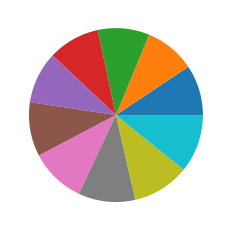

In [38]:
plt.pie(lowFullyVaccineRate)

In [39]:
print(fullyVaccineRate)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0749137382298082, 0.4795135932060697, 0.9147106188932758, 2.986538257676186, 5.3615332339989905, 10.006914808166458, 10.749059856969529, 12.812021930129356, 14.33342230553883, 14.810002014886802, 15.095051299427508, 15.854310184152926, 16.529463958315546, 16.825833916318118, 28.941870513613747, 29.721509920388943, 31.02891789033357, 31.324758074962514, 31.39566000372383, 33.184975445737294, 33.903536022042736, 38.768599747048476, 41.02006318239761, 41.72594984778627, 41.75805265908248, 45.34874014632226, 46.90563087772455, 47.36351992438732, 51.18432263561488, 51.232417279871854, 52.1421024093873, 52.50084883965216, 53.407806713282234, 53.53865364752083, 53.56071549225901, 54.68842678353423, 56.94704664234296, 57.58240322818404, 59.630088108934686, 62.11712989222916, 63.13388429752066, 63.41696423450861, 63.863612777147914, 63.9947758499862, 64.10719479286314, 64.72178812607619, 65.297042376767

In [40]:
print(df['people_fully_vaccinated_per_hundred'])

0      10.75
1      12.81
2      41.73
3       0.00
4       0.00
       ...  
226    57.68
227    56.10
228     1.26
229    10.48
230    22.61
Name: people_fully_vaccinated_per_hundred, Length: 231, dtype: float64


In [41]:
fullyVaccineRatePer100 = []
f = 0
for x in myvar:
    fullyVaccineRatePer100.append(df['people_fully_vaccinated_per_hundred'].values[f])
    f = f+1

In [42]:
ln = len(fullyVaccineRatePer100)
ln

231

In [43]:
print(fullyVaccineRatePer100)

[10.75, 12.81, 41.73, 0.0, 0.0, 16.53, 63.13, 62.12, 79.44, 31.03, 75.17, 65.3, 79.59, 72.67, 46.91, 38.77, 0.0, 52.5, 52.14, 0.0, 78.16, 51.18, 0.0, 74.48, 73.69, 47.36, 0.0, 0.0, 51.23, 72.87, 56.95, 91.61, 29.72, 5.36, 0.07, 81.83, 2.99, 81.39, 53.41, 89.82, 15.85, 0.0, 89.9, 85.48, 65.75, 33.9, 0.0, 72.77, 74.48, 14.81, 54.69, 87.37, 59.63, 72.02, 63.86, 0.48, 81.58, 10.01, 41.02, 53.54, 76.0, 28.94, 65.33, 14.33, 0.0, 63.42, 0.0, 0.0, 64.72, 72.6, 0.0, 0.0, 68.77, 76.36, 77.66, 63.99, 0.0, 0.0, 31.4, 74.93, 15.1, 121.53, 72.82, 67.7, 33.18, 31.32, 0.0, 0.0, 16.83, 41.76, 0.91, 73.31, 45.35, 69.84, 64.11, 78.49, 57.58, 53.56, 0.0, 65.65, 16.74, 79.94, 78.09, 65.9, 78.88, 22.09, 79.61, 78.1, 42.7, 47.44, 13.95, 41.54, 45.88, 75.71, 17.86, 59.09, 69.63, 32.07, 33.7, 0.0, 15.83, 68.89, 69.55, 7.31, 47.31, 0.0, 75.21, 3.48, 4.18, 78.6, 68.29, 4.23, 89.91, 0.0, 21.85, 0.0, 60.73, 0.0, 25.95, 0.0, 65.28, 44.67, 35.11, 62.42, 35.68, 38.82, 14.45, 60.13, 71.95, 62.27, 77.45, 59.94, 4.18, 4

In [44]:
c = 0
for x in myvar:
    if fullyVaccineRatePer100[c] < 5 and fullyVaccineRatePer100[c] > 0 :
        print(df['location'].values[c])
    c = c + 1 

Burundi
Cameroon
Democratic Republic of Congo
Haiti
Madagascar
Malawi
Mali
Niger
Nigeria
Papua New Guinea
Tanzania
Yemen


In [45]:
for i in range(ln-1):
        for j in range(0, ln-i-1):
            if fullyVaccineRatePer100[j] > fullyVaccineRatePer100[j+1] :
                fullyVaccineRatePer100[j], fullyVaccineRatePer100[j+1] = fullyVaccineRatePer100[j+1], fullyVaccineRatePer100[j]
 

In [46]:
print(fullyVaccineRatePer100)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07, 0.48, 0.91, 1.26, 2.74, 2.99, 3.48, 4.0, 4.06, 4.18, 4.18, 4.23, 5.36, 5.73, 6.0, 6.94, 7.31, 10.01, 10.48, 10.75, 11.85, 12.81, 13.51, 13.95, 14.25, 14.33, 14.45, 14.81, 15.1, 15.83, 15.85, 16.3, 16.53, 16.74, 16.83, 17.86, 21.85, 22.09, 22.61, 25.95, 26.43, 27.09, 28.15, 28.94, 29.02, 29.72, 31.03, 31.32, 31.4, 32.07, 32.86, 33.18, 33.7, 33.9, 34.91, 35.02, 35.11, 35.68, 38.77, 38.82, 39.9, 41.02, 41.54, 41.73, 41.76, 42.19, 42.67, 42.7, 44.57, 44.61, 44.67, 45.35, 45.88, 46.91, 47.31, 47.36, 47.44, 47.52, 49.11, 49.43, 49.77, 50.18, 50.53, 51.18, 51.23, 52.14, 52.5, 53.09, 53.41, 53.54, 53.56, 54.69, 56.1, 56.82, 56.95, 57.52, 57.58, 57.68, 58.64, 58.81, 58.82, 58.87, 59.09, 59.53, 59.63, 59.94, 60.13, 60.61, 60.73, 61.83, 62.12, 62.16, 62.27, 62.42, 63.13, 63.42, 63.86, 63.99, 64.11, 64.7